In [1]:
import retinanalysis as ra
import pandas as pd
import numpy as np
pd.__version__

[2025-07-01 10:24:02,042][INFO]: Connecting root@127.0.0.1:3306
[2025-07-01 10:24:02,206][INFO]: Connected root@127.0.0.1:3306


'2.0.3'

In [2]:
# This seems bugged, need to fix...
# ra.database_pop.reload_celltypefiles()

In [3]:
df = ra.get_datasets_from_protocol_names('dsos')
df.tail()


Found 1 protocols matching "dsos":
['manookinlab.protocols.GratingDSOS']

Found 56 experiments, 80 epoch blocks.



,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
75,20250131C,data014,0.0,motion2,manookinlab.protocols.GratingDSOS,1,20250131C/data014,gratingDSOS,117,12,2140,3240,405
76,20250131C,data015,0.0,motion2,manookinlab.protocols.GratingDSOS,1,20250131C/data015,gratingDSOS,117,12,2140,3241,405
77,20250307C,data021,0.0,shane,manookinlab.protocols.GratingDSOS,1,20250307C/data021,Shane Grating,124,12,2250,3392,466
78,20250307C,data022,0.0,shane,manookinlab.protocols.GratingDSOS,1,20250307C/data022,Shane Grating Try 2,124,12,2251,3393,466
79,20250307C,data034,0.0,grating_ds,manookinlab.protocols.GratingDSOS,1,20250307C/data034,GratingDSOS,124,12,2260,3404,458


In [4]:
idxs = [78]
s1 = ra.StimBlock(df.at[idxs[0], 'exp_name'], df.at[idxs[0], 'datafile_name'])
r1 = ra.ResponseBlock(df.at[idxs[0], 'exp_name'], df.at[idxs[0], 'datafile_name'])
ac1 = ra.AnalysisChunk(df.at[idxs[0], 'exp_name'], s1.nearest_noise_chunk)

pp = ra.MEAPipeline(s1, r1, ac1)
qc1 = ra.qc.MEAQC(pp.response_block, ac1, pp.match_dict)

Loading VCD from /Volumes/data-1/data/sorted/20250307C/data022/kilosort2.5 ...
Loading VCD from /Volumes/data-1/analysis/20250307C/s_noise/kilosort2.5 ...

Ref clusters matched: 345
Ref clusters unmatched: 762
31.17% matched, 68.83% unmatched.
Using 1.5 ms refractory period.
Using first 3 bins for refractory period calculation.


In [5]:
qc1.df_qc

,cell_type,noise_spikes,noise_isi_violations,crf_f1,ei_corr,protocol_spikes,protocol_isi_violations,analysis_chunk_cell_id
cell_id,,,,,,,,
1,NaN,29034,0.000000,NaN,0.986745,2188,0.000000,1
17,Unmatched,3677,0.000000,NaN,0.932497,743,0.000000,12
24,NaN,764,0.000000,NaN,0.808538,49,0.000000,20
41,NaN,8544,0.000000,NaN,0.950545,778,0.000000,23
28,NaN,25883,0.000000,NaN,0.964035,1499,0.000000,25
...,...,...,...,...,...,...,...,...
849,NaN,10317,0.039424,NaN,0.854253,315,0.000000,1601
885,NaN,7667,0.036704,NaN,0.852714,563,0.000000,1609
1048,NaN,24817,0.004571,NaN,0.979545,794,0.255754,1650


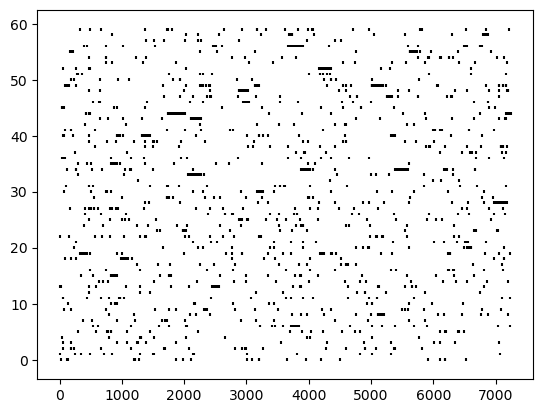

In [9]:
import matplotlib.pyplot as plt
cell_idx = 12
sts = r1.df_spike_times.iloc[cell_idx,0]
for i in range(r1.n_epochs):
    plt.eventplot(sts[i], lineoffsets=i, linelengths=0.5, colors='black')